In [1]:
import pandas as pd
# import modin.pandas as mpd
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns

# import geopandas as gpd

# from scipy import ndimage

# import contextily as cx

# import matplotlib.pylab as pylab
# import matplotlib

from shapely.geometry import Point
from shapely.geometry import LineString

from utils.maputils import generate_3857_df, generate_lines,\
                            generate_buffers,generate_base_length\

from utils.routineutils import generate_routine, generate_adjusted_geometry,\
                                generate_belonging_relations, \
                                generate_cum_length, generate_correct_geometry,\
                                generate_station_status\
                                    ,generate_interpolation
            
from utils.timeutils import time_transfer

d:\my_programs_git\Transportation-Statistics-Course-Design\utils\maputils.py:9: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
# res = pd.read_pickle('./data/output/gps_6.pkl')
# res.columns
# len(res)
# routine = generate_routine(res, 7, 1)

# mapdf = pd.read_excel('./data/map/map_down.xlsx')
# mapdf = generate_3857_df(mapdf)
# mapline = generate_lines(mapdf)
# mapline = generate_buffers(mapline)
# mapline = generate_base_length(mapline)

# import geopandas as gpd
# plt_mapline = gpd.GeoDataFrame(mapline)
# plt_routine = gpd.GeoDataFrame(routine)
# fig, ax = plt.subplots(1,2,figsize=(9,6),dpi=300)
# plt_mapline['rect_buffer'].plot(ax = ax[0], color = 'blue', alpha=0.3)
# plt_mapline.plot(ax = ax[0], color = 'orange',alpha=0.6)
# plt_routine.plot(ax = ax[0], color = 'red', alpha = 0.5, markersize = 5)

# plt_mapline['rect_buffer'].plot(ax = ax[1], color = 'blue', alpha=0.3)
# plt_mapline.plot(ax = ax[1], color = 'orange',alpha=0.6)
# adjusted_routine = gpd.GeoDataFrame({'geometry':plt_routine['adjusted_geometry']})
# adjusted_routine.plot(ax = ax[1], color = 'red', alpha = 0.5, markersize = 5)

# ax[0].set_xlim((7800+1.349e7, 8700+1.349e7))
# ax[0].set_ylim((3.679e6, 3.682e6))
# ax[1].set_xlim((7800+1.349e7, 8700+1.349e7))
# ax[1].set_ylim((3.679e6, 3.682e6))


In [3]:
gps = pd.read_csv('./data/gps/gps_0906.csv')
gps = time_transfer(gps)
gps = generate_3857_df(gps)

generate_3857_df:   0%|          | 0/86559 [00:00<?, ?it/s]

d:\programs\envs\ox\lib\site-packages\pandas\core\dtypes\cast.py:127: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


In [4]:
gps.loc[gps['deadheading']==1].groupby(['nidx', 'direction']).agg('count')

vid  time  lon  lat  deadheading  month  day  geometry
nidx direction                                                        
1    0          207   207  207  207          207    207  207       207
10   0          178   178  178  178          178    178  178       178
15   0          101   101  101  101          101    101  101       101
     1          530   530  530  530          530    530  530       530
55   1          383   383  383  383          383    383  383       383
84   1          202   202  202  202          202    202  202       202
101  0          318   318  318  318          318    318  318       318
102  0          360   360  360  360          360    360  360       360
103  0          366   366  366  366          366    366  366       366

In [5]:
# mapdf = pd.read_excel('./data/map/map_up.xlsx')
mapdf = pd.read_excel('./data/map/map_down.xlsx')
mapdf = generate_3857_df(mapdf)

mapline = generate_lines(mapdf)
mapline = generate_buffers(mapline)
mapline = generate_base_length(mapline)

generate_3857_df:   0%|          | 0/89 [00:00<?, ?it/s]

d:\programs\envs\ox\lib\site-packages\pandas\core\dtypes\cast.py:127: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


In [6]:
routine = generate_routine(gps, 42, 1)

In [7]:
og_routine = generate_belonging_relations(routine, mapline)
routine = og_routine.copy(deep=True)
routine = generate_adjusted_geometry(routine)
routine = generate_cum_length(routine, mapline)
routine = generate_correct_geometry(routine)

In [8]:
len(routine), len(routine.loc[routine['diff_distance']<0])

(337, 0)

In [9]:
routine = generate_interpolation(routine, mapline)

337


d:\programs\envs\ox\lib\site-packages\pandas\core\apply.py:995: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  result = super().apply_broadcast(target.T)
d:\programs\envs\ox\lib\site-packages\pandas\core\apply.py:853: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ares = np.asarray(res).ndim
d:\programs\envs\ox\lib\site-packages\pandas\core\apply.py:995: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  result = super().apply_broadcast(target.T)
d:\programs\envs\ox\lib\site-packages\pandas\core\apply.py:853: VisibleDeprecationWarning: Creating an ndarray from ragged n

500


d:\programs\envs\ox\lib\site-packages\pandas\core\apply.py:853: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ares = np.asarray(res).ndim
d:\programs\envs\ox\lib\site-packages\pandas\core\apply.py:995: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  result = super().apply_broadcast(target.T)
d:\programs\envs\ox\lib\site-packages\pandas\core\apply.py:853: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ares = np.asarray(res).ndim
d:\programs\envs\ox\li

646
667


d:\programs\envs\ox\lib\site-packages\pandas\core\apply.py:995: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  result = super().apply_broadcast(target.T)
d:\programs\envs\ox\lib\site-packages\pandas\core\apply.py:853: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ares = np.asarray(res).ndim


In [10]:
routine.columns

Index(['vid', 'time', 'lon', 'lat', 'direction', 'nidx', 'deadheading',
       'month', 'day', 'geometry', 'belong_rect_buffer', 'belong_circ_buffer',
       'belong_line', 'belong_line_idx', 'selected_line', 'selected_line_idx',
       'adjusted_geometry', 'base_length', 'end_length', 'start_is_station',
       'end_is_station', 'start', 'end', 'cur_length', 'cum_length',
       'diff_distance', 'diff_time', 'velocity'],
      dtype='object')

In [11]:
routine.selected_line_idx

0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
662    86.0
663    87.0
664    87.0
665    87.0
666    87.0
Name: selected_line_idx, Length: 667, dtype: object

In [12]:

routine = generate_station_status(routine)
routine

,vid,time,lon,lat,direction,nidx,deadheading,month,day,geometry,...,start_is_station,end_is_station,start,end,cur_length,cum_length,diff_distance,diff_time,velocity,station_status
0,8,2021-09-06 08:20:14,121.24971,31.332954,1,42,0,9,6,POINT (13497455.97603209 3676065.4699321394),...,False,False,交叉口0,交叉口1,18.393187,43.916359,NaN,NaN,0.0,0
1,8,2021-09-06 08:20:42,121.24966,31.333178,1,42,0,9,6,POINT (13497450.410057552 3676094.6630563634),...,False,False,交叉口0,交叉口1,28.408539,53.931711,10.015352,28.0,1.071587,0
2,8,2021-09-06 08:20:52,121.250206,31.33339,1,42,0,9,6,POINT (13497511.190499526 3676122.2923272187),...,False,False,交叉口0,交叉口1,61.605785,87.128957,33.197246,10.0,3.319725,0
3,8,2021-09-06 08:21:02,121.250206,31.33339,1,42,0,9,6,POINT (13497511.190499526 3676122.2923272187),...,False,False,交叉口0,交叉口1,94.803031,120.326203,33.197246,10.0,3.319725,0
4,8,2021-09-06 08:21:12,121.250496,31.333433,1,42,0,9,6,POINT (13497543.473151853 3676127.8963850318),...,False,False,交叉口0,交叉口1,125.46524,150.988412,30.662209,10.0,3.066221,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,8,2021-09-06 09:31:52,121.250305,31.404629,1,42,0,9,6,POINT (13497522.211129112 3685410.1682125945),...,False,False,交叉口58,交叉口59,431.38083,17729.381675,28.368717,2.0,11.347487,0
663,8,2021-09-06 09:31:55,121.250305,31.405476,1,42,0,9,6,POINT (13497522.211129112 3685520.6392998),...,False,True,交叉口59,菊园车站,19.353036,17757.040017,27.658341,3.0,11.063337,菊园车站
664,8,2021-09-06 09:31:57,121.250305,31.405476,1,42,0,9,6,POINT (13497522.211129112 3685520.6392998),...,False,True,交叉口59,菊园车站,47.011377,17784.698358,27.658341,2.0,11.063337,菊园车站
665,8,2021-09-06 09:32:00,121.250305,31.405476,1,42,0,9,6,POINT (13497522.211129112 3685520.6392998),...,False,True,交叉口59,菊园车站,74.669719,17812.356699,27.658341,3.0,11.063337,菊园车站


In [14]:
station_time_res = routine.loc[routine['station_status'] != 0, ['time','cum_length', 'station_status']].groupby('station_status').agg('mean').sort_values('time')
station_time_res

,time,cum_length
station_status,,
双单路胜辛路,2021-09-06 08:29:38.000000000,902.254520
云屏路双丁路,2021-09-06 08:30:41.500000000,1308.035857
双丁路永盛路,2021-09-06 08:35:07.333333248,2487.782021
永盛路双丁路,2021-09-06 08:36:36.000000000,2940.071580
永盛路伊宁路,2021-09-06 08:39:13.500000000,3742.989453
永盛路天祝路,2021-09-06 08:41:50.999999744,4367.903783
塔秀路永盛路,2021-09-06 08:43:02.000000000,4828.144007
塔秀路德富路,2021-09-06 08:44:07.000000000,5122.476179
阿克苏路白银路,2021-09-06 08:44:59.000000000,5501.992871


In [15]:
len(station_time_res)

28

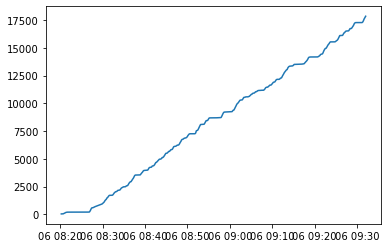

In [16]:
plt.plot(routine['time'], routine['cum_length'])

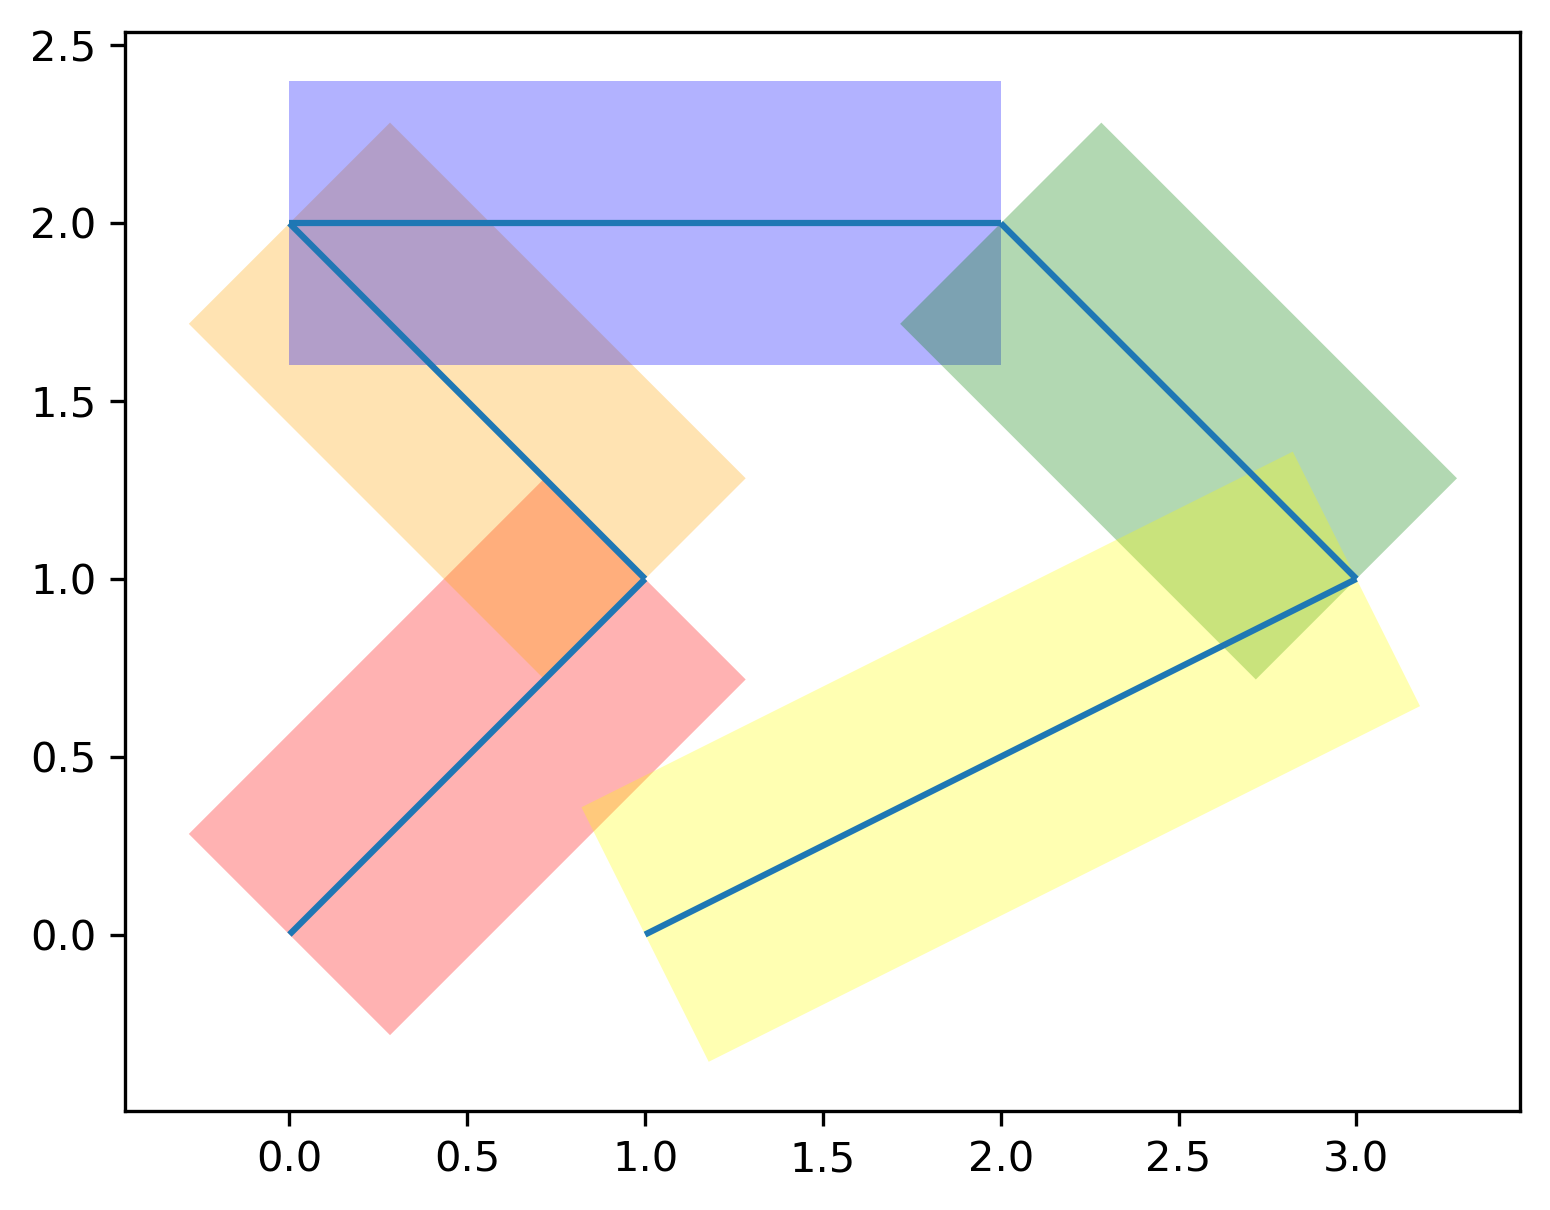

In [79]:
import geopandas as gpd
# testline = LineString([(0, 0), (1, 1), (0, 2), (2, 2), (3, 1), (1, 0)])
testlines = gpd.GeoSeries([LineString([(0, 0), (1, 1)]),
                            LineString([(1, 1), (0, 2)]),
                            LineString([(0, 2), (2, 2)]),
                            LineString([(2, 2), (3, 1)]),
                            LineString([(3, 1), (1, 0)])])
testbuffer = testlines.buffer(0.4, cap_style=2, join_style=2)
fig, ax = plt.subplots(figsize=(6,6),dpi=300)
gpd.GeoSeries(testlines).plot(ax = ax)
color = ['red','orange','blue','green','yellow']
for i in range(len(testbuffer)):
    gpd.GeoSeries(testbuffer[i]).plot(ax = ax, color = color[i], alpha=0.3)

<AxesSubplot:>

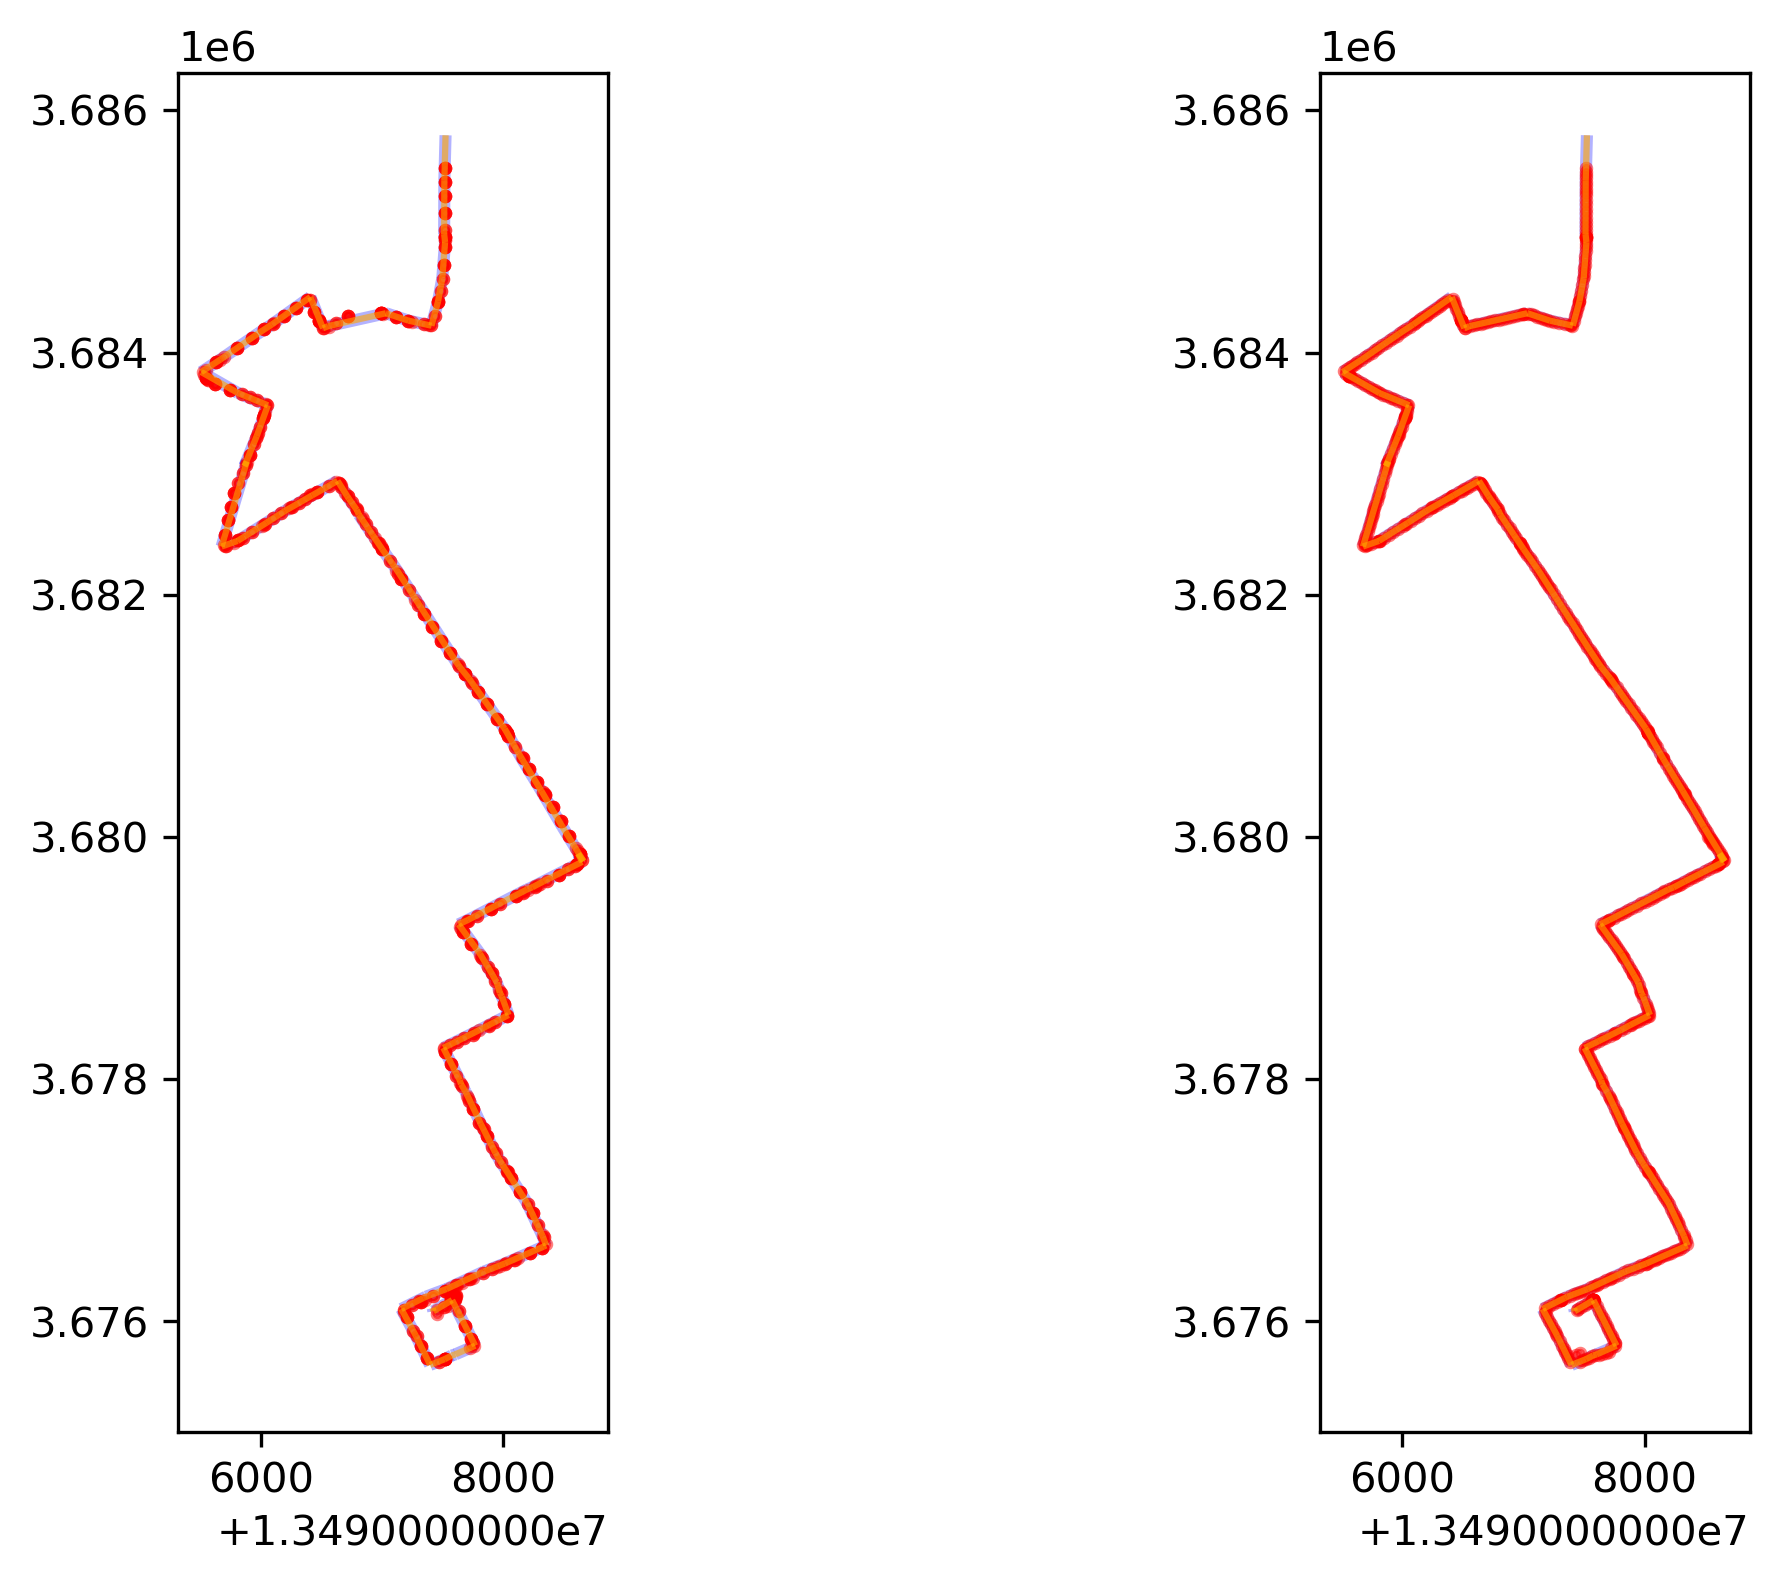

In [17]:
import geopandas as gpd
plt_mapline = gpd.GeoDataFrame(mapline)
plt_routine = gpd.GeoDataFrame(routine)
fig, ax = plt.subplots(1,2,figsize=(9,6),dpi=300)
plt_mapline['rect_buffer'].plot(ax = ax[0], color = 'blue', alpha=0.3)
plt_mapline.plot(ax = ax[0], color = 'orange',alpha=0.6)
plt_routine.plot(ax = ax[0], color = 'red', alpha = 0.5, markersize = 5)

# ax[0].set_xlim((5400+1.349e7, 6500+1.349e7))
# ax[0].set_ylim((3.6822e6, 3.684e6))
# ax[0].set_xlim((7000+1.349e7, 8000+1.349e7))
# ax[0].set_ylim((3.685e6, 3.686e6))

plt_mapline['rect_buffer'].plot(ax = ax[1], color = 'blue', alpha=0.3)
plt_mapline.plot(ax = ax[1], color = 'orange',alpha=0.6)
adjusted_routine = gpd.GeoDataFrame({'geometry':plt_routine['adjusted_geometry']})
adjusted_routine.plot(ax = ax[1], color = 'red', alpha = 0.5, markersize = 5)


# ax[1].set_xlim((5400+1.349e7, 6500+1.349e7))
# ax[1].set_ylim((3.6822e6, 3.684e6))
# ax[1].set_xlim((7000+1.349e7, 8000+1.349e7))
# ax[1].set_ylim((3.685e6, 3.686e6))

# mapline['rect_buffer'].plot(ax = ax[2], color = 'blue', alpha=0.3)
# mapline.plot(ax = ax[2], color = 'orange',alpha=0.6)
# adjusted_routine = gpd.GeoDataFrame({'geometry':test_routine['adjusted_geometry']})
# adjusted_routine.plot(ax = ax[2], color = 'red', alpha = 0.5, markersize = 5)
# # routine['adjusted_geometry'].plot(ax = ax[1], color = 'red', alpha = 0.5, markersize = 5)

# # ax[1].set_xlim((5400+1.349e7, 6500+1.349e7))
# # ax[1].set_ylim((3.6822e6, 3.684e6))
# ax[2].set_xlim((7000+1.349e7, 8000+1.349e7))
# ax[2].set_ylim((3.685e6, 3.686e6))

# ax[0].set_xlim((7800+1.349e7, 9000+1.349e7))
# ax[0].set_ylim((3.679e6, 3.682e6))
# ax[1].set_xlim((7800+1.349e7, 9000+1.349e7))
# ax[1].set_ylim((3.679e6, 3.682e6))


In [81]:
370
371
372
373
374

374

In [82]:
from shapely import geometry as geo
def check(idx_list):
    res = []
    for idx in idx_list:
        buffer = routine.loc[idx, 'belong_rect_buffer'][0]
        line = routine.loc[idx, 'selected_line']
        point = routine.loc[idx, 'adjusted_geometry']
        res += [buffer,line,point]
    return res
    

In [83]:
169 173

SyntaxError: invalid syntax (Temp/ipykernel_11236/1848837256.py, line 1)

In [ ]:
geo.GeometryCollection(check([169, 170, 171, 173]))

In [ ]:
buffer = routine.loc[2, 'belong_rect_buffer'][0]
line = routine.loc[2, 'selected_line']
point = routine.loc[2, 'adjusted_geometry']
from shapely import geometry as geo
geo.GeometryCollection([buffer,line,point])

In [ ]:
mapdf

In [ ]:
mapline

In [ ]:
mapline

,name,geometry,start,end,start_is_station,end_is_station,circ_buffer,rect_buffer,end_length,base_length
0,公交嘉定新城站-交叉口0,"LINESTRING (13497418.239 3676110.042, 13497423...",公交嘉定新城站,交叉口0,True,False,"POLYGON ((13497472.207 3676094.588, 13497472.9...","POLYGON ((13497472.207 3676094.588, 13497374.0...",25.523172,0.000000
1,交叉口0-交叉口1,"LINESTRING (13497423.137 3676084.993, 13497578...",交叉口0,交叉口1,False,False,"POLYGON ((13497552.647 3676219.269, 13497556.9...","POLYGON ((13497552.647 3676219.269, 13497603.3...",179.730418,25.523172
2,交叉口1-交叉口2,"LINESTRING (13497578.016 3676176.183, 13497768...",交叉口1,交叉口2,False,False,"POLYGON ((13497813.081 3675822.569, 13497815.0...","POLYGON ((13497813.081 3675822.569, 13497723.8...",421.661292,205.253589
3,交叉口2-交叉口3,"LINESTRING (13497768.472 3675799.985, 13497605...",交叉口2,交叉口3,False,False,"POLYGON ((13497625.118 3675683.073, 13497620.5...","POLYGON ((13497625.118 3675683.073, 13497585.2...",178.098314,626.914881
4,交叉口3-交叉口4,"LINESTRING (13497605.166 3675728.920, 13497575...",交叉口3,交叉口4,False,False,"POLYGON ((13497590.984 3675671.693, 13497586.2...","POLYGON ((13497590.984 3675671.693, 13497559.9...",31.242678,805.013196
...,...,...,...,...,...,...,...,...,...,...
83,菊园新村-交叉口57,"LINESTRING (13497461.876 3684422.494, 13497496...",菊园新村,交叉口57,True,False,"POLYGON ((13497447.721 3684622.058, 13497448.8...","POLYGON ((13497447.721 3684622.058, 13497546.0...",193.716993,16737.207632
84,交叉口57-嘉行公路平城路,"LINESTRING (13497496.897 3684613.019, 13497519...",交叉口57,嘉行公路平城路,False,True,"POLYGON ((13497469.795 3684915.618, 13497470.4...","POLYGON ((13497469.795 3684915.618, 13497569.5...",299.667656,16930.924625
85,嘉行公路平城路-交叉口58,"LINESTRING (13497519.651 3684911.822, 13497512...",嘉行公路平城路,交叉口58,True,False,"POLYGON ((13497462.520 3684973.303, 13497462.2...","POLYGON ((13497462.520 3684973.303, 13497561.9...",67.408563,17230.592282
86,交叉口58-交叉口59,"LINESTRING (13497512.215 3684978.819, 13497513...",交叉口58,交叉口59,False,False,"POLYGON ((13497463.707 3685418.672, 13497463.9...","POLYGON ((13497463.707 3685418.672, 13497563.7...",439.686136,17298.000845


In [ ]:
print(routine[['time','base_length', 'cum_length', 'end_length','start','end']])

                   time   base_length    cum_length  end_length  start    end
0   2021-09-06 12:54:19     25.523172     40.804717  179.730418   交叉口0   交叉口1
1   2021-09-06 12:54:22     25.523172     40.804717  179.730418   交叉口0   交叉口1
2   2021-09-06 12:54:42     25.523172     46.983946  179.730418   交叉口0   交叉口1
3   2021-09-06 12:54:52     25.523172     69.581619  179.730418   交叉口0   交叉口1
4   2021-09-06 12:55:02     25.523172     85.327552  179.730418   交叉口0   交叉口1
..                  ...           ...           ...         ...    ...    ...
715 2021-09-06 14:16:11  17298.000845  17702.117221  439.686136  交叉口58  交叉口59
716 2021-09-06 14:16:21  17298.000845  17702.117221  439.686136  交叉口58  交叉口59
717 2021-09-06 14:16:31  17298.000845  17714.120074  439.686136  交叉口58  交叉口59
718 2021-09-06 14:16:36  17298.000845  17756.445171  439.686136  交叉口58  交叉口59
719 2021-09-06 14:16:41   17737.68698  17798.770268  375.649536  交叉口59   菊园车站

[720 rows x 6 columns]
